In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

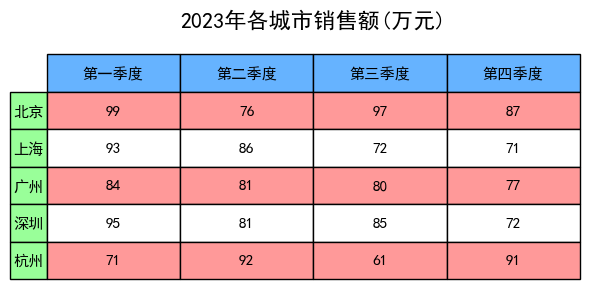

In [3]:
# 生成示例数据
data = [[f'{np.random.randint(60,100)}' for _ in range(4)] for _ in range(5)]
columns = ('第一季度', '第二季度', '第三季度', '第四季度')
rows = ('北京', '上海', '广州', '深圳', '杭州')

# 创建图表
fig, ax = plt.subplots(figsize=(6, 3))
# 隐藏坐标轴（轴线、刻度等）
ax.axis('off')

# 创建带样式的表格
table = ax.table(
    cellText=data,                  # 表格主体数据
    rowLabels=rows,                 # 行标签
    colLabels=columns,              # 列标签
    cellLoc='center',               # 单元格文字对齐方式：居中
    loc='center',                   # 表格在子图中的位置：居中
    colColours=['#66b3ff']*4,       # 列标题背景色
    rowColours=['#99ff99']*5,       # 行标题背景色
    # 单元格背景色：偶数行（i%2==0）为浅红色奇数行为白色，实现隔行变色效果
    cellColours=[['#ff9999' if i%2==0 else '#ffffff' for _ in range(4)] for i in range(5)],
    bbox=[0, 0, 1, 1]               # 表格在子图中的布局：[左,下,宽,高]，占满整个子图（无留白）
)

# 表格样式优化
# 关闭自动字体大小调整，以便手动设置字体尺寸
table.auto_set_font_size(False)
# 设置表格文字大小为11号
table.set_fontsize(11)
# 缩放表格：水平方向缩放1.2倍（加宽），垂直方向缩放1.8倍（加高），避免内容拥挤
table.scale(1.2, 1.8)

plt.title('2023年各城市销售额(万元)', pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# 2、使用示例：

### 示例 1：表格与图表结合

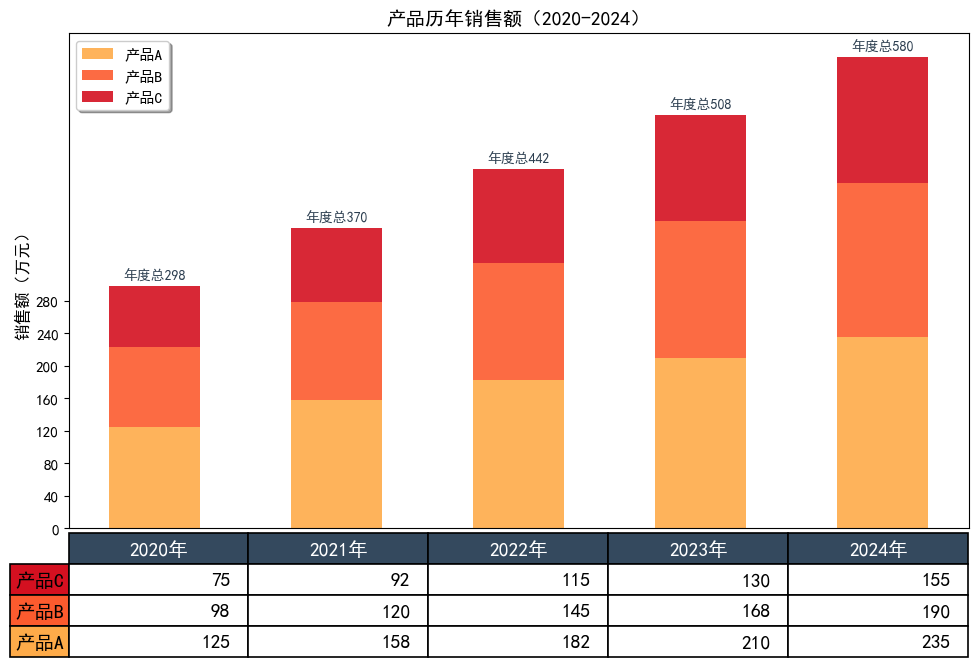

In [4]:
plt.figure(figsize=(12, 9), dpi=100)

# 生成数据：各产品历年实际销售额
data = [[125, 158, 182, 210, 235],  # 产品A历年销售额
        [98, 120, 145, 168, 190],   # 产品B历年销售额
        [75, 92, 115, 130, 155]]    # 产品C历年销售额

# 列标签：年份
columns = ('2020年', '2021年', '2022年', '2023年', '2024年')
# 行标签：产品名称
rows = ['产品A', '产品B', '产品C']

# 配置Y轴刻度适配数据范围（最大值+50）
max_sales = max([max(row) for row in data])
values = np.arange(0, max_sales + 50, 40)  # 50为冗余值，避免最大值紧贴刻度顶


# =========================== 绘制堆叠柱状图 ===========================
# 配置柱状图位置与宽度
index = np.arange(len(columns)) + 0.4  # X轴位置微调，与表格列对齐
bar_width = 0.5  # 柱子宽度0.5

# 配置堆叠柱状图颜色
colors = plt.cm.YlOrRd(np.linspace(0.4, 0.8, len(rows)))  # 黄橙红色系，3个产品对应3种颜色
n_rows = len(data)  # 产品数量（3个）

# 用于堆叠图表的偏移量
y_offset = np.zeros(len(columns))  

# 表格数据
cell_text = []
for row in range(n_rows):
    # 绘制当前产品的堆叠柱形图
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row], alpha=0.9)
    y_offset = y_offset + data[row]
    cell_text.append([val for val in data[row]])

# 在堆叠柱形顶部显示总和
for i, total in enumerate(y_offset):
    plt.text(
        i + 0.4, total + 5, f'年度总{total:.0f}',
        ha='center', va='bottom', fontsize=10, fontweight='bold', color='#2C3E50'
    )
    
# =========================== 绘制表格 ===========================
# 反转颜色：确保表格行背景色与图表堆叠层颜色对应
colors = colors[::-1]
cell_text = cell_text[::-1]  # 反转表格数据顺序，与颜色反转后匹配

the_table = plt.table(
    cellText=cell_text,       # 表格数据
    rowLabels=rows[::-1],     # 行标签反转：与cell_text顺序一致
    rowColours=colors,        # 行背景色：与图表堆叠层颜色对应
    colLabels=columns,        # 列标签
    loc='bottom',
    bbox=[0, -0.26, 1, 0.25] 
)

# 根据返回值设置表格样式
the_table.set_fontsize(14)  # 表格字体
the_table.scale(1, 2.2)     # 缩放
# 表格边框加粗
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(1.2)
    # 表头（列标签）样式：深色背景+白色文字，与数据行区分
    if key[0] == 0:  # key[0]为行索引，0代表列标签行
        cell.set_facecolor('#34495E')
        cell.set_text_props(color='white', weight='bold')


# 画布边距调整
plt.subplots_adjust(left=0.15, bottom=0.35, top=0.9)
# 图表标签
plt.ylabel('销售额（万元）', fontsize=12, fontweight='bold')
plt.yticks(values, [f'{int(val)}' for val in values], fontsize=11)
plt.xticks([])  # 隐藏X轴刻度，由表格列标签替代
plt.title('产品历年销售额（2020-2024）', fontsize=14, fontweight='bold')
# 添加产品图例
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, alpha=0.9) for color in colors[::-1]]
plt.legend(legend_elements, rows, loc='upper left', fontsize=11, frameon=True, shadow=True)
plt.show()